In [91]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



In [92]:
df=pd.read_csv("baseballs (1).csv")
df.head()


,Batting average,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


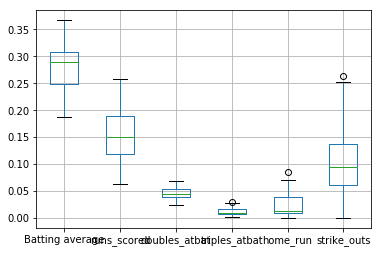

In [93]:
df.boxplot()

In [94]:
def out(df_in,col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    IQR = q3-q1
    uw = q3+(1.5*IQR)
    lw = q1-(1.5*IQR)
    df_out = df_in[~((df_in < (q1 - 1.5 * IQR)) |(df_in > (q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [95]:
df.shape

(45, 6)

In [96]:
df1=out(df,df.columns)
df1.head()

,Batting average,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


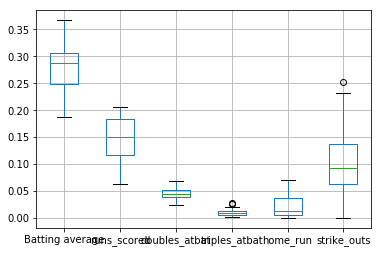

In [97]:
df1.boxplot()

In [9]:
# these outliers are of new data. you can keep them

In [98]:
df1.isnull().sum()

Batting average    0
runs_scored        0
doubles_atbat      0
triples_atbat      0
home_run           0
strike_outs        0
dtype: int64

In [99]:
X=df1.drop("Batting average",axis=1)
Y=df1["Batting average"]

In [100]:
X.shape

(42, 5)

In [101]:
Y.shape

(42,)

In [102]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [103]:
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Batting average   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     44.03
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           2.35e-14
Time:                        10:04:11   Log-Likelihood:                 113.52
No. Observations:                  42   AIC:                            -215.0
Df Residuals:                      36   BIC:                            -204.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1796      0.018      9.795      0.000       0.142       0.217
runs_scored       0.4573      0.114      4.003      0.000       0.226       0.689
doubles_atbat     0.9969      0.317      3.140      0.003       0.353       1.641
triples_atbat     0.8622      0.623      1.384      0.175      -0.401       2.125
home_run          0.2569      0.173      1.487      0.146      -0.094       0.607
strike_outs      -0.2867      0.058     -4.919      0.000      -0.405      -0.168
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.126
Skew:                           0.059   Prob(JB):                        0.939
Kurtosis:                       2.759   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X_constant.head()

,const,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
0,1.0,0.144,0.049,0.012,0.013,0.086
1,1.0,0.125,0.039,0.013,0.002,0.062
2,1.0,0.141,0.045,0.021,0.013,0.074
3,1.0,0.189,0.043,0.001,0.030,0.032
4,1.0,0.161,0.044,0.011,0.070,0.076


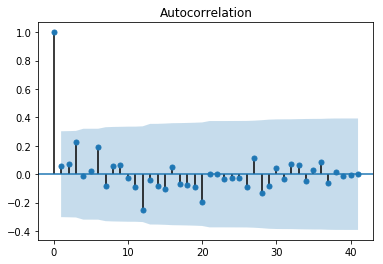

In [105]:
import statsmodels.tsa.api as smt

acf=smt.graphics.plot_acf(lin_reg.resid)
acf.show()

In [30]:
# Check Durbin-Watson:	1.8, no auto correlation between residuals. (Value should be 2)

In [31]:
#Assumption 2 : Normality of residuals.

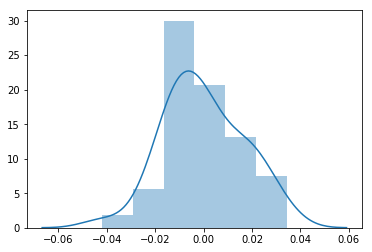

In [106]:
import seaborn as sns
sns.distplot(lin_reg.resid)

In [107]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(0.1255910847149563, 0.9391354674848555)


In [51]:
# JB value is more than 5.99 so residuals are normal.

In [52]:
# Rainbow test:


In [108]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg)

(1.0696694915346254, 0.4554645617677618)

In [55]:
#Null hypo: the residuals are linear.
#Alternate hypo: residuals are not linear.

# As p value is >0.05, hence the null hypothesis is accepted. So, residuals are linear.

In [56]:
# Assumption 4: Homoscedasticity test using Goldfeld test or beush wagon test:

##lzip: combine outcome data

In [109]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=["F statistic","p value"]
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

lzip(name,test)

[('F statistic', 0.5016134533059536), ('p value', 0.9034552110848537)]

In [58]:
# # as p value is > than 0.05, null hypo is accepted.


#our null hypothesis: Follows  homoscedaccity 

In [59]:
#Assumption 5: Multicollinearity

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

pd.DataFrame({"vif":vif[1:]}, index=X.columns).T

,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
vif,2.633386,1.46854,2.189409,1.674171,1.591548


In [63]:
# Here, all values are less than 5.99.. so, multi collinearity doesn't exist.

In [113]:
#Evaluation parameters


In [111]:
df1.head()

,Batting average,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [112]:
X_constant.head()

,const,runs_scored,doubles_atbat,triples_atbat,home_run,strike_outs
0,1.0,0.144,0.049,0.012,0.013,0.086
1,1.0,0.125,0.039,0.013,0.002,0.062
2,1.0,0.141,0.045,0.021,0.013,0.074
3,1.0,0.189,0.043,0.001,0.030,0.032
4,1.0,0.161,0.044,0.011,0.070,0.076


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [116]:
lr.score(x_train,y_train)

0.8590045824107526

In [117]:
lr.score(x_test,y_test)

0.8147536436359724

In [118]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(mse)
print(mae,mse,RMSE)

0.018840664503825825 0.0004702648656805202 0.021685591199700326


The model is perfectly balanced with 85% training accuracy and 81% testing accuracy with minimal errors.